In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

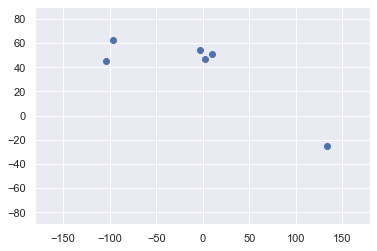

In [4]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [5]:
# ilocはdataをsliceするのに用いられる。一つ目は何列ぶん、二つ目は何行分(但し、最初の数は+1)を表す。
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

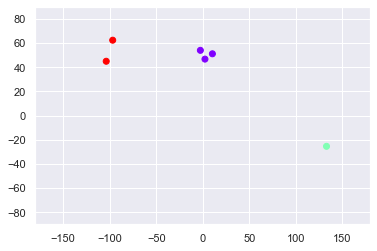

In [8]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c= data_with_clusters['Clusters'],cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [9]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [10]:
x = data_mapped.iloc[:,1:4]

In [11]:
kmeans = KMeans(2)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

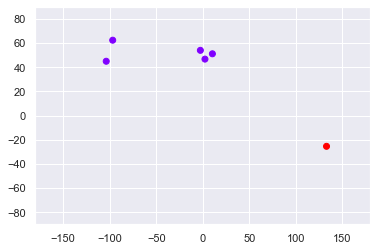

In [12]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c= data_with_clusters['Clusters'],cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [13]:
# wcss(最小二乗的な数)
kmeans.inertia_

13208.958119999996

In [14]:
wcsslist = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcsslist.append(kmeans.inertia_)

In [15]:
wcsslist

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

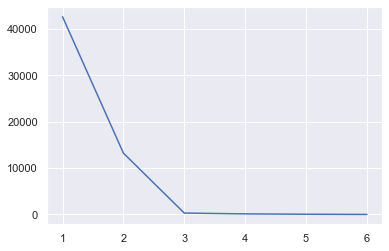

In [16]:
#大きすぎもなく小さすぎもないため3が最適っぽい。
number_clusters = range(1,7)
plt.plot(number_clusters,wcsslist)
plt.show()

# Market Segment演習

In [17]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

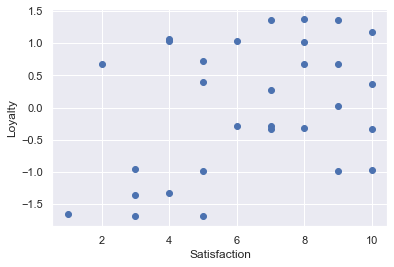

In [18]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [19]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

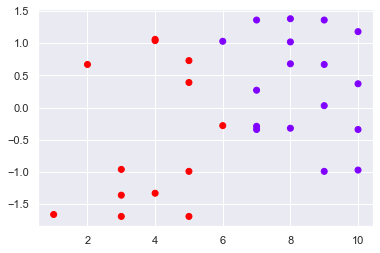

In [21]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap = 'rainbow')
#標準化をしていないため横幅が広く、loyaltyが重要に思われなかった可能性

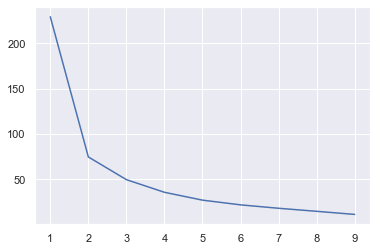

In [25]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)    

In [26]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


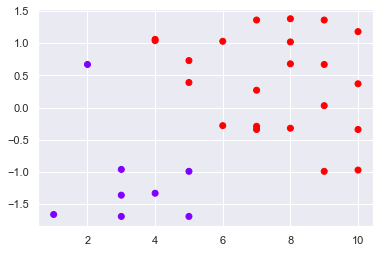

In [27]:
# fittingは標準化された数字で行ったが、ここで示すデータは元の縮尺のまま。
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap = 'rainbow')
#一番あだ名がちょうどよくつけられるところが一番クラスターの数としては良いと言える。(今回は4つ)

# クラスターの意義

- 直感的に洞察を得ることができる。(探索的分析)
- 現象の説明や仮説の確認ができる。(新しいこと、というよりは既知のことを強める。)

In [30]:
data = pd.read_csv('Country clusters standardized.csv',index_col ='Country')
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [31]:
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'],axis= 1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


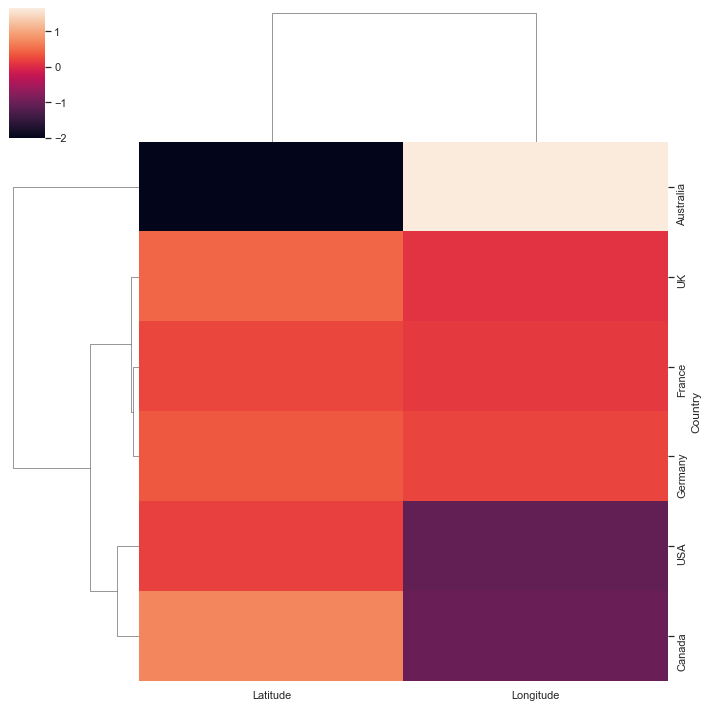

In [33]:
sns.clustermap(x_scaled)
#２つの要素を一つにするので次元削減になる